# The affluence variable

This markdown contains the following:

* Correlation between personal and household income categories
* Investigating household 'affluence' in different regions (this is not just for interest as it is no longer used to prepare the variable)
* Determining the national median of the median household incomes
* Preparing the personal income affluence indicator for the models

Set up the environment

In [1]:
import pandas as pd 
from pandas import read_csv
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sn


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Read in the household and personal income files

In [2]:
# Group D
groupD=pd.read_csv("CompleteSet_GroupD.csv")
groupD=groupD.drop("Unnamed: 0",axis=1)
#Strip all leading whitespace in Area column
groupD['Area'] = groupD['Area'].apply(lambda x: x.strip())

#Remove total NZ row
groupD = groupD.loc[(groupD['Area'] != "Total - New Zealand by Regional Council/SA2")]
#Remove total regions
groupD = groupD.loc[(groupD['ParentArea'] != "NewZealand")]

#Keep only 2013 and 2018
#groupD = groupD.loc[(groupD['Year'] == 2013) | (groupD['Year']==2018)]

groupD = groupD.drop([ 'less5k_Wholesale', 'less5k_Retail',
                      'less5k_TransPostWare', 'bet5k10k_Wholesale',
                      'bet5k10k_Retail', 'bet5k10k_TransPostWare',
                      'bet10k20k_Wholesale', 'bet10k20k_Retail', 'bet10k20k_TransPostWare',
                       'bet20k30k_Wholesale', 'bet20k30k_Retail',
                      'bet20k30k_TransPostWare', 'bet30k50k_Wholesale',
                      'bet30k50k_Retail', 'bet30k50k_TransPostWare',
                      'bet50k70k_Wholesale', 'bet50k70k_Retail', 'bet50k70k_TransPostWare', 'greater70k_Wholesale', 'greater70k_Retail',
                      'greater70k_TransPostWare', 'totStated_Wholesale',
                      'totStated_Retail', 'totStated_TransPostWare',
                      'notStated_Wholesale', 'notStated_Retail', 'notStated_TransPostWare'], axis=1)

groupD['Perc_Cat']=-99

print(groupD.shape)

# Group G
groupG=pd.read_csv("CompleteSet_GroupG.csv")
groupG=groupG.drop("Unnamed: 0",axis=1)
#Strip all leading whitespace in Area column
groupG['Area'] = groupG['Area'].apply(lambda x: x.strip())


#Remove total NZ row
groupG = groupG.loc[(groupG['Area'] != "Total - New Zealand by Regional Council/SA2")]
#Remove total regions
groupG = groupG.loc[(groupG['ParentArea'] != "NewZealand")]

print(groupG.shape)

(6759, 13)
(4506, 14)


### Correlation between personal and household income categories

Household income per SA2 level is only available for 2013 and 2018. It is important for this project to add the 2006 timestamp as well. Personal incomeper SA2 is available for 2006, 2013, and 2018. Therefore, we want to investigate whether we can use personal income as a proxy for household income. 

There are 7 categories in both the personal income and household income data.

|Category |Personal income|Household income|
|---|---|---|
|cat1|less5k|less20k|
|cat2|between5k10k|between20k30k|
|cat3|between10k20k|between30k50k|
|cat4|between20k30k|between50k70k|
|cat5|between30k50k|between70k100k|
|cat6|between50k70k|between100k150k|
|cat7|greater 70k|greater150k|


First we visually inspect the correlations between the categories. 

In [3]:
#Preparing the data
cat1_house_2013 = np.array(groupG.loc[(groupG['Year'] == 2013)].less20k.tolist())
cat1_house_2013 = np.nan_to_num(cat1_house_2013,copy=False,nan=0.0)
cat2_house_2013 = np.array(groupG.loc[(groupG['Year'] == 2013)].bet20k_30k.tolist())
cat2_house_2013 = np.nan_to_num(cat2_house_2013,copy=False,nan=0.0)
cat3_house_2013 = np.array(groupG.loc[(groupG['Year'] == 2013)].bet30k_50k.tolist())
cat3_house_2013 = np.nan_to_num(cat3_house_2013,copy=False,nan=0.0)
cat4_house_2013 = np.array(groupG.loc[(groupG['Year'] == 2013)].bet50k_70k.tolist())
cat4_house_2013 = np.nan_to_num(cat4_house_2013,copy=False,nan=0.0)
cat5_house_2013 = np.array(groupG.loc[(groupG['Year'] == 2013)].bet70k_100k.tolist())
cat5_house_2013 = np.nan_to_num(cat5_house_2013,copy=False,nan=0.0)
cat6_house_2013 = np.array(groupG.loc[(groupG['Year'] == 2013)].bet100k_150k.tolist())
cat6_house_2013 = np.nan_to_num(cat6_house_2013,copy=False,nan=0.0)
cat7_house_2013 = np.array(groupG.loc[(groupG['Year'] == 2013)].greater150k.tolist())
cat7_house_2013 = np.nan_to_num(cat7_house_2013,copy=False,nan=0.0)

cat1_house_2018 = np.array(groupG.loc[(groupG['Year'] == 2018)].less20k.tolist())
cat1_house_2018 = np.nan_to_num(cat1_house_2018,copy=False,nan=0.0)
cat2_house_2018 = np.array(groupG.loc[(groupG['Year'] == 2018)].bet20k_30k.tolist())
cat2_house_2018 = np.nan_to_num(cat2_house_2018,copy=False,nan=0.0)
cat3_house_2018 = np.array(groupG.loc[(groupG['Year'] == 2018)].bet30k_50k.tolist())
cat3_house_2018 = np.nan_to_num(cat3_house_2018,copy=False,nan=0.0)
cat4_house_2018 = np.array(groupG.loc[(groupG['Year'] == 2018)].bet50k_70k.tolist())
cat4_house_2018 = np.nan_to_num(cat4_house_2018,copy=False,nan=0.0)
cat5_house_2018 = np.array(groupG.loc[(groupG['Year'] == 2018)].bet70k_100k.tolist())
cat5_house_2018 = np.nan_to_num(cat5_house_2018,copy=False,nan=0.0)
cat6_house_2018 = np.array(groupG.loc[(groupG['Year'] == 2018)].bet100k_150k.tolist())
cat6_house_2018 = np.nan_to_num(cat6_house_2018,copy=False,nan=0.0)
cat7_house_2018 = np.array(groupG.loc[(groupG['Year'] == 2018)].greater150k.tolist())
cat7_house_2018 = np.nan_to_num(cat7_house_2018,copy=False,nan=0.0)

cat1_pers_2013 = np.array(groupD.loc[(groupD['Year'] == 2013)].less5k_TotInd.tolist())
cat1_pers_2013 = np.nan_to_num(cat1_pers_2013,copy=False,nan=0.0)
cat2_pers_2013 = np.array(groupD.loc[(groupD['Year'] == 2013)].bet5k10k_TotInd.tolist())
cat2_pers_2013 = np.nan_to_num(cat2_pers_2013,copy=False,nan=0.0)
cat3_pers_2013 = np.array(groupD.loc[(groupD['Year'] == 2013)].bet10k20k_TotInd.tolist())
cat3_pers_2013 = np.nan_to_num(cat3_pers_2013,copy=False,nan=0.0)
cat4_pers_2013 = np.array(groupD.loc[(groupD['Year'] == 2013)].bet20k30k_TotInd.tolist())
cat4_pers_2013 = np.nan_to_num(cat4_pers_2013,copy=False,nan=0.0)
cat5_pers_2013 = np.array(groupD.loc[(groupD['Year'] == 2013)].bet30k50k_TotInd.tolist())
cat5_pers_2013 = np.nan_to_num(cat5_pers_2013,copy=False,nan=0.0)
cat6_pers_2013 = np.array(groupD.loc[(groupD['Year'] == 2013)].bet50k70k_TotInd.tolist())
cat6_pers_2013 = np.nan_to_num(cat6_pers_2013,copy=False,nan=0.0)
cat7_pers_2013 = np.array(groupD.loc[(groupD['Year'] == 2013)].greater70k_TotInd.tolist())
cat7_pers_2013 = np.nan_to_num(cat7_pers_2013,copy=False,nan=0.0)

cat1_pers_2018 = np.array(groupD.loc[(groupD['Year'] == 2018)].less5k_TotInd.tolist())
cat1_pers_2018 = np.nan_to_num(cat1_pers_2018,copy=False,nan=0.0)
cat2_pers_2018 = np.array(groupD.loc[(groupD['Year'] == 2018)].bet5k10k_TotInd.tolist())
cat2_pers_2018 = np.nan_to_num(cat2_pers_2018,copy=False,nan=0.0)
cat3_pers_2018 = np.array(groupD.loc[(groupD['Year'] == 2018)].bet10k20k_TotInd.tolist())
cat3_pers_2018 = np.nan_to_num(cat3_pers_2018,copy=False,nan=0.0)
cat4_pers_2018 = np.array(groupD.loc[(groupD['Year'] == 2018)].bet20k30k_TotInd.tolist())
cat4_pers_2018 = np.nan_to_num(cat4_pers_2018,copy=False,nan=0.0)
cat5_pers_2018 = np.array(groupD.loc[(groupD['Year'] == 2018)].bet30k50k_TotInd.tolist())
cat5_pers_2018 = np.nan_to_num(cat5_pers_2018,copy=False,nan=0.0)
cat6_pers_2018 = np.array(groupD.loc[(groupD['Year'] == 2018)].bet50k70k_TotInd.tolist())
cat6_pers_2018 = np.nan_to_num(cat6_pers_2018,copy=False,nan=0.0)
cat7_pers_2018 = np.array(groupD.loc[(groupD['Year'] == 2018)].greater70k_TotInd.tolist())
cat7_pers_2018 = np.nan_to_num(cat7_pers_2018,copy=False,nan=0.0)

#### Category 1 comparison
2013 left pane, 2018 right pane

x - household

y - personal income

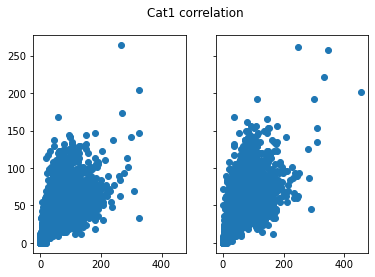

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True,sharey=True)
fig.suptitle('Cat1 correlation')
ax1.scatter(cat1_house_2013, cat1_pers_2013)
ax2.scatter(cat1_house_2018, cat1_pers_2018)

Not great evidence of correlation

#### Category 2 comparison
2013 left pane, 2018 right pane

x - household

y - personal income

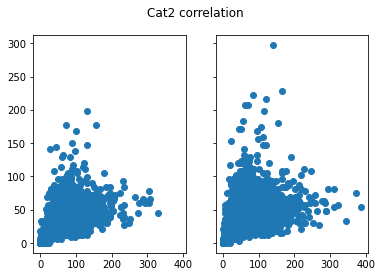

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True,sharey=True)
fig.suptitle('Cat2 correlation')
ax1.scatter(cat2_house_2013, cat2_pers_2013)
ax2.scatter(cat2_house_2018, cat2_pers_2018)

Not great evidence of correlation

#### Category 3 comparison
2013 left pane, 2018 right pane

x - household

y - personal income

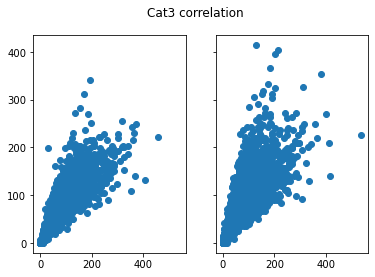

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True,sharey=True)
fig.suptitle('Cat3 correlation')
ax1.scatter(cat3_house_2013, cat3_pers_2013)
ax2.scatter(cat3_house_2018, cat3_pers_2018)

This is starting to look like something, but not convincing yet...

#### Category 4 comparison
2013 left pane, 2018 right pane

x - household

y - personal income

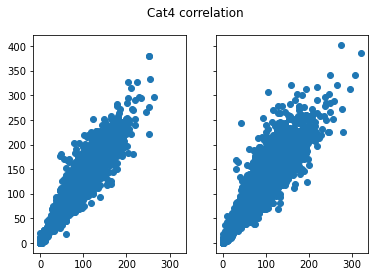

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True,sharey=True)
fig.suptitle('Cat4 correlation')
ax1.scatter(cat4_house_2013, cat4_pers_2013)
ax2.scatter(cat4_house_2018, cat4_pers_2018)

This is starting to look like something.

In [8]:
# Covariance

print("2013")
covariance = np.cov([cat4_pers_2013], [cat4_house_2013])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(cat4_pers_2013, cat4_house_2013)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(cat4_pers_2013, cat4_house_2013)
print('Spearmans correlation: %.3f' % corrS)

print("2018")
covariance = np.cov([cat4_pers_2018], [cat4_house_2018])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(cat4_pers_2018, cat4_house_2018)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(cat4_pers_2018, cat4_house_2018)
print('Spearmans correlation: %.3f' % corrS)

2013
[[3868.36143874 2856.73690911]
 [2856.73690911 2452.07337878]]
Pearsons correlation: 0.928
Spearmans correlation: 0.923
2018
[[4270.58390234 3035.37528766]
 [3035.37528766 2713.699943  ]]
Pearsons correlation: 0.892
Spearmans correlation: 0.890


#### Category 5 comparison
2013 left pane, 2018 right pane

x - household

y - personal income

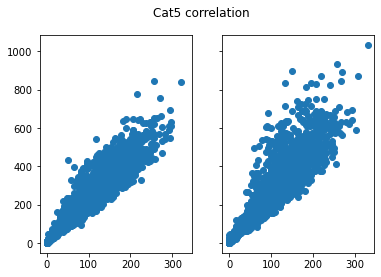

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True,sharey=True)
fig.suptitle('Cat5 correlation')
ax1.scatter(cat5_house_2013, cat5_pers_2013)
ax2.scatter(cat5_house_2018, cat5_pers_2018)

The linear relation is tightening up.

In [10]:
# Covariance

print("2013")
covariance = np.cov([cat5_pers_2013], [cat5_house_2013])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(cat5_pers_2013, cat5_house_2013)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(cat5_pers_2013, cat5_house_2013)
print('Spearmans correlation: %.3f' % corrS)

print("2018")
covariance = np.cov([cat5_pers_2018], [cat5_house_2018])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(cat5_pers_2018, cat5_house_2018)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(cat5_pers_2018, cat5_house_2018)
print('Spearmans correlation: %.3f' % corrS)

2013
[[20697.48207837  8360.83519842]
 [ 8360.83519842  3881.68318973]]
Pearsons correlation: 0.933
Spearmans correlation: 0.935
2018
[[27720.1182686   8900.68759948]
 [ 8900.68759948  3623.58380182]]
Pearsons correlation: 0.888
Spearmans correlation: 0.905


#### Category 6 comparison
2013 left pane, 2018 right pane

x - household

y - personal income

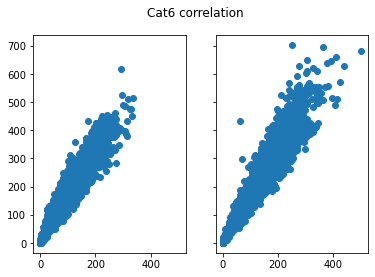

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True,sharey=True)
fig.suptitle('Cat6 correlation')
ax1.scatter(cat6_house_2013, cat6_pers_2013)
ax2.scatter(cat6_house_2018, cat6_pers_2018)

There's a line...

In [12]:
# Covariance

print("2013")
covariance = np.cov([cat6_pers_2013], [cat6_house_2013])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(cat6_pers_2013, cat6_house_2013)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(cat6_pers_2013, cat6_house_2013)
print('Spearmans correlation: %.3f' % corrS)

print("2018")
covariance = np.cov([cat6_pers_2018], [cat6_house_2018])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(cat6_pers_2018, cat6_house_2018)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(cat6_pers_2018, cat6_house_2018)
print('Spearmans correlation: %.3f' % corrS)

2013
[[10910.94214109  6555.33528297]
 [ 6555.33528297  4358.71521453]]
Pearsons correlation: 0.951
Spearmans correlation: 0.959
2018
[[17630.81355942 10268.88813317]
 [10268.88813317  6660.82567707]]
Pearsons correlation: 0.948
Spearmans correlation: 0.956


#### Category 7 comparison
2013 left pane, 2018 right pane

x - household

y - personal income

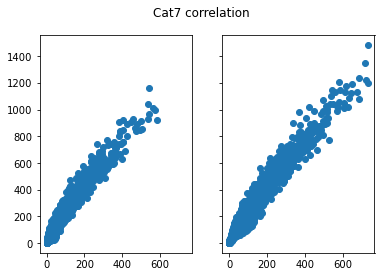

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True,sharey=True)
fig.suptitle('Cat7 correlation')
ax1.scatter(cat7_house_2013, cat7_pers_2013)
ax2.scatter(cat7_house_2018, cat7_pers_2018)

That's convincing.

In [14]:
# Covariance

print("2013")
covariance = np.cov([cat7_pers_2013], [cat7_house_2013])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(cat7_pers_2013, cat7_house_2013)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(cat7_pers_2013, cat7_house_2013)
print('Spearmans correlation: %.3f' % corrS)

print("2018")
covariance = np.cov([cat7_pers_2018], [cat7_house_2018])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(cat7_pers_2018, cat7_house_2018)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(cat7_pers_2018, cat7_house_2018)
print('Spearmans correlation: %.3f' % corrS)

2013
[[28128.42417688 13418.13415801]
 [13418.13415801  6824.68569084]]
Pearsons correlation: 0.968
Spearmans correlation: 0.967
2018
[[50316.71805857 25831.09189583]
 [25831.09189583 13954.21735732]]
Pearsons correlation: 0.975
Spearmans correlation: 0.973


So what we are observing is that there is strong correlation between personal income and household income categories on the affluent side of the scale. So we can use personal income as a proxy for household income IF our variable is "affluence" and not "poverty"

### Investigating household affluence in different regions

What constitutes "affluence" is different in different cities/regions. Here we want to differentiate between the category cut-off for affluence by region. To do that, we start with the histogram of median incomes per SA2 in each area. 

Let's use Auckland as an illustration

80th percentile Auck 2013: 95320.00000000001
The 80th perc in 2013 was in category: 5
80th percentile Auck 2018: 116300.0
The 80th perc in 2018 was in category: 6


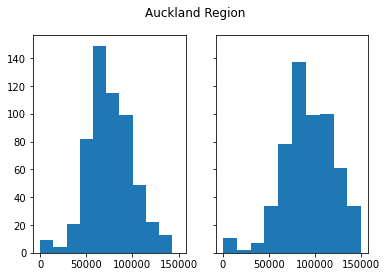

In [15]:
medHouseInc2013_Auck=np.array(groupG.loc[(groupG['Year'] == 2013)&(groupG['ParentArea'] == 'AucklandRegion')].MedInc.tolist())
medHouseInc2013_Auck = np.nan_to_num(medHouseInc2013_Auck,copy=False,nan=0.0)

medHouseInc2018_Auck=np.array(groupG.loc[(groupG['Year'] == 2018)&(groupG['ParentArea'] == 'AucklandRegion')].MedInc.tolist())
medHouseInc2018_Auck = np.nan_to_num(medHouseInc2018_Auck,copy=False,nan=0.0)

fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True,sharey=True)
fig.suptitle('Auckland Region')
ax1.hist(medHouseInc2013_Auck)
ax2.hist(medHouseInc2018_Auck)

#80th percentile
print("80th percentile Auck 2013:",np.percentile(medHouseInc2013_Auck,80))
#determine in which category the 80th percentile falls
perc=np.percentile(medHouseInc2013_Auck,80)
if (perc > 50000) & (perc <= 70000):
    cat=4
elif (perc > 70000) & (perc <= 100000):
    cat=5
elif (perc > 100000) & (perc <= 150000):
    cat=6
elif (perc > 150000):
    cat=7
else:
    cat=-99  
print("The 80th perc in 2013 was in category:",cat)

#80th percentile
print("80th percentile Auck 2018:",np.percentile(medHouseInc2018_Auck,80))
#determine in which category the 80th percentile falls
perc=np.percentile(medHouseInc2018_Auck,80)
if (perc > 50000) & (perc <= 70000):
    cat=4
elif (perc > 70000) & (perc <= 100000):
    cat=5
elif (perc > 100000) & (perc <= 150000):
    cat=6
elif (perc > 150000):
    cat=7
else:
    cat=-99  
print("The 80th perc in 2018 was in category:",cat)

# add the cat to the groupD file

#groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'AucklandRegion'),'Perc_Cat']=cat

Therefore, the affluence indicator in the Auckland Region in 2013 is the percentage of individuals who earn an income in cat 5 and up (i.e. cat 5 + cat 6 + cat 7), whereas in 2018 it is the percentage of individuals who earn an income of cat 6 and up. 

But now what about 2006? Do we just assume it's a category difference?

Let's test whether there are category differences in the other regions.

#### Run for all regions and update groupD
I am keeping this Group D update here so that we could see the results for the different regions later, but I never write this updated columns to csv, so it isn't used to calculate the variable. 

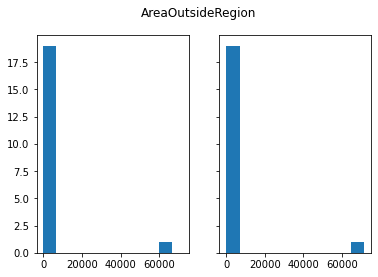

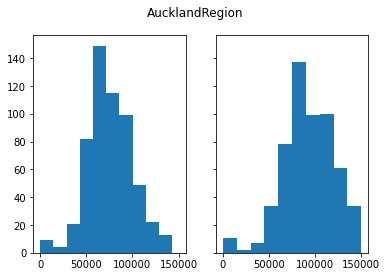

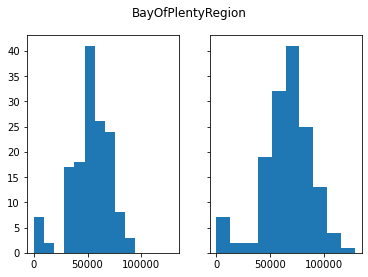

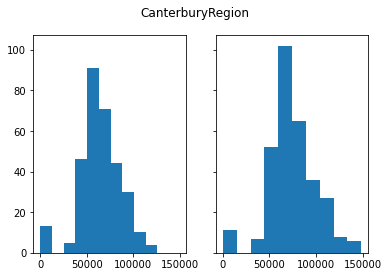

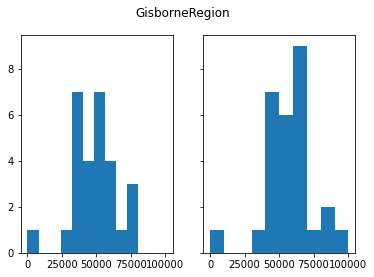

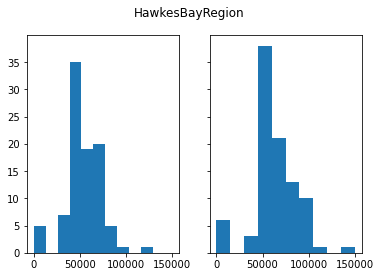

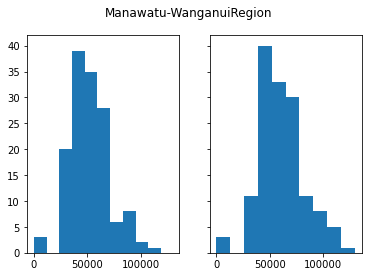

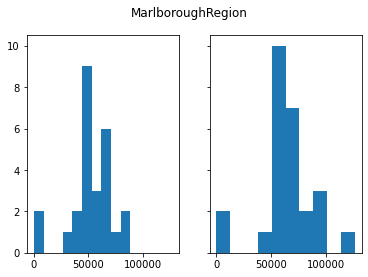

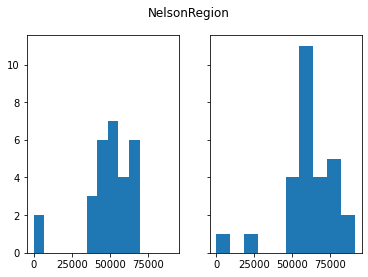

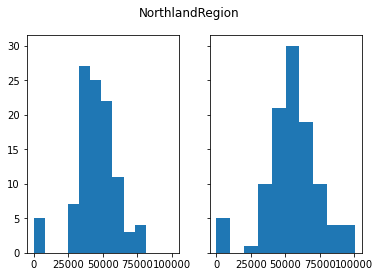

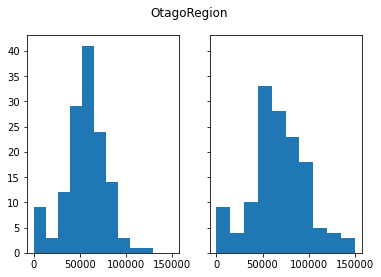

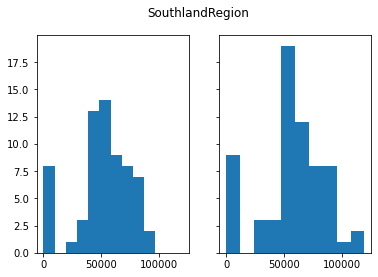

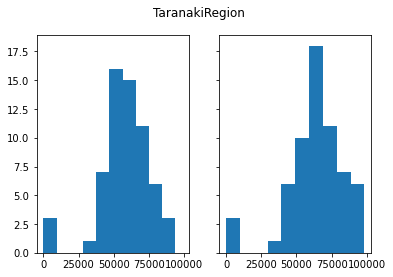

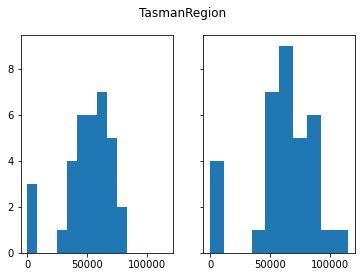

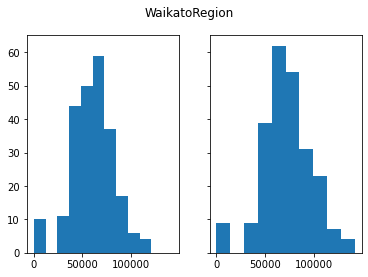

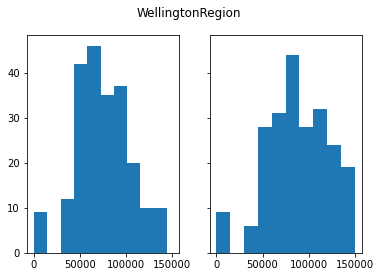

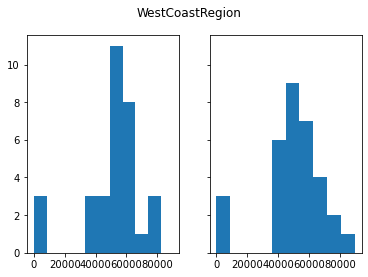

In [16]:
def extractMed(year,region):
    medDat=np.array(groupG.loc[(groupG['Year'] == year)&(groupG['ParentArea'] == region)].MedInc.tolist())
    medDat=np.nan_to_num(medDat,copy=False,nan=0.0)
    return(medDat)

def scatters(dat2013,dat2018,region):
    fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True,sharey=True)
    fig.suptitle(region)
    ax1.hist(dat2013)
    ax2.hist(dat2018)

def determinePerc(dat):
    perc=np.percentile(dat,80)
    if (perc > 50000) & (perc <= 70000):
        cat=4
    elif (perc > 70000) & (perc <= 100000):
        cat=5
    elif (perc > 100000) & (perc <= 150000):
        cat=6
    elif (perc > 150000):
        cat=7
    else:
        cat=-99  
    return(cat)

def replaceVals(year,region,cat):
    groupD.loc[(groupD['Year'] == year)&(groupD['ParentArea'] == region),'Perc_Cat']=cat
    

regionMaster=['AreaOutsideRegion','AucklandRegion','BayOfPlentyRegion','CanterburyRegion','GisborneRegion','HawkesBayRegion',
             'Manawatu-WanganuiRegion','MarlboroughRegion','NelsonRegion','NorthlandRegion','OtagoRegion','SouthlandRegion',
              'TaranakiRegion','TasmanRegion','WaikatoRegion','WellingtonRegion','WestCoastRegion']

for region in regionMaster:
    data2013=extractMed(2013,region)
    data2018=extractMed(2018,region)
    scatters(data2013,data2018,region)
    replaceVals(2013,region,determinePerc(data2013))
    replaceVals(2018,region,determinePerc(data2018))

In [99]:
print("AreaOutsideRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'AreaOutsideRegion')].Perc_Cat.tolist()))
print("AreaOutsideRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'AreaOutsideRegion')].Perc_Cat.tolist()))
print()
print("AucklandRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'AucklandRegion')].Perc_Cat.tolist()))
print("AucklandRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'AucklandRegion')].Perc_Cat.tolist()))
print()
print("BayOfPlentyRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'BayOfPlentyRegion')].Perc_Cat.tolist()))
print("BayOfPlentyRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'BayOfPlentyRegion')].Perc_Cat.tolist()))
print()
print("CanterburyRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'CanterburyRegion')].Perc_Cat.tolist()))
print("CanterburyRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'CanterburyRegion')].Perc_Cat.tolist()))
print()
print("GisborneRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'GisborneRegion')].Perc_Cat.tolist()))
print("GisborneRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'GisborneRegion')].Perc_Cat.tolist()))
print()
print("HawkesBayRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'HawkesBayRegion')].Perc_Cat.tolist()))
print("HawkesBayRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'HawkesBayRegion')].Perc_Cat.tolist()))
print()
print("Manawatu-WanganuiRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'Manawatu-WanganuiRegion')].Perc_Cat.tolist()))
print("Manawatu-WanganuiRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'Manawatu-WanganuiRegion')].Perc_Cat.tolist()))
print()
print("MarlboroughRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'MarlboroughRegion')].Perc_Cat.tolist()))
print("MarlboroughRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'MarlboroughRegion')].Perc_Cat.tolist()))
print()
print("NelsonRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'NelsonRegion')].Perc_Cat.tolist()))
print("NelsonRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'NelsonRegion')].Perc_Cat.tolist()))
print()
print("NorthlandRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'NorthlandRegion')].Perc_Cat.tolist()))
print("NorthlandRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'NorthlandRegion')].Perc_Cat.tolist()))
print()
print("OtagoRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'OtagoRegion')].Perc_Cat.tolist()))
print("OtagoRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'OtagoRegion')].Perc_Cat.tolist()))
print()
print("SouthlandRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'SouthlandRegion')].Perc_Cat.tolist()))
print("SouthlandRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'SouthlandRegion')].Perc_Cat.tolist()))
print()
print("TaranakiRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'TaranakiRegion')].Perc_Cat.tolist()))
print("TaranakiRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'TaranakiRegion')].Perc_Cat.tolist()))
print()
print("TasmanRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'TasmanRegion')].Perc_Cat.tolist()))
print("TasmanRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'TasmanRegion')].Perc_Cat.tolist()))
print()
print("WaikatoRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'WaikatoRegion')].Perc_Cat.tolist()))
print("WaikatoRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'WaikatoRegion')].Perc_Cat.tolist()))
print()
print("WellingtonRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'WellingtonRegion')].Perc_Cat.tolist()))
print("WellingtonRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'WellingtonRegion')].Perc_Cat.tolist()))
print()
print("WestCoastRegion 2013: ",np.unique(groupD.loc[(groupD['Year'] == 2013)&(groupD['ParentArea'] == 'WestCoastRegion')].Perc_Cat.tolist()))
print("WestCoastRegion 2018: ",np.unique(groupD.loc[(groupD['Year'] == 2018)&(groupD['ParentArea'] == 'WestCoastRegion')].Perc_Cat.tolist()))


AreaOutsideRegion 2013:  [-99]
AreaOutsideRegion 2018:  [-99]

AucklandRegion 2013:  [5]
AucklandRegion 2018:  [6]

BayOfPlentyRegion 2013:  [4]
BayOfPlentyRegion 2018:  [5]

CanterburyRegion 2013:  [5]
CanterburyRegion 2018:  [5]

GisborneRegion 2013:  [4]
GisborneRegion 2018:  [4]

HawkesBayRegion 2013:  [4]
HawkesBayRegion 2018:  [5]

Manawatu-WanganuiRegion 2013:  [4]
Manawatu-WanganuiRegion 2018:  [5]

MarlboroughRegion 2013:  [4]
MarlboroughRegion 2018:  [5]

NelsonRegion 2013:  [4]
NelsonRegion 2018:  [5]

NorthlandRegion 2013:  [4]
NorthlandRegion 2018:  [4]

OtagoRegion 2013:  [5]
OtagoRegion 2018:  [5]

SouthlandRegion 2013:  [5]
SouthlandRegion 2018:  [5]

TaranakiRegion 2013:  [5]
TaranakiRegion 2018:  [5]

TasmanRegion 2013:  [4]
TasmanRegion 2018:  [5]

WaikatoRegion 2013:  [5]
WaikatoRegion 2018:  [5]

WellingtonRegion 2013:  [5]
WellingtonRegion 2018:  [6]

WestCoastRegion 2013:  [4]
WestCoastRegion 2018:  [4]


How do we know whether we can extrapolate the trend back to 2006? Consider regional GDP growth 2006-2013-2018

I drew the stats for regional GDP (RNA) per person from StatsNZ and compared the growth rates between 2006-2013 and 2013-2018. There is NO OBVIOUS LOGICAL CONNECTION between the nominal annual growth rates and whether a egion's 80th percential median income jumped a category or not. 

This may be because the categories are too broad. What if I compare growth in RNA to growth in 80th percentile of median income?

#### Calculating growth rates in 80th percentile of median income

In [17]:
#RNA growth rates from excel sheet
arr2=np.array([27,27,19,23,22,20,30,25,27,25,22,-4,25,22,16,13])
arr1 = np. array([])
for region in regionMaster:
    data2013=extractMed(2013,region)
    data2018=extractMed(2018,region)
    perc2013=np.percentile(data2013,80)
    perc2018=np.percentile(data2018,80)
    if perc2018-perc2013!=0:
        arr1=np.append(arr1,round((perc2018-perc2013)/perc2013*100))
        print("Growth for ",region,":",round((perc2018-perc2013)/perc2013*100),"%")

Growth for  AucklandRegion : 22 %
Growth for  BayOfPlentyRegion : 23 %
Growth for  CanterburyRegion : 17 %
Growth for  GisborneRegion : 13 %
Growth for  HawkesBayRegion : 24 %
Growth for  Manawatu-WanganuiRegion : 16 %
Growth for  MarlboroughRegion : 16 %
Growth for  NelsonRegion : 20 %
Growth for  NorthlandRegion : 22 %
Growth for  OtagoRegion : 28 %
Growth for  SouthlandRegion : 12 %
Growth for  TaranakiRegion : 13 %
Growth for  TasmanRegion : 26 %
Growth for  WaikatoRegion : 19 %
Growth for  WellingtonRegion : 21 %
Growth for  WestCoastRegion : 2 %


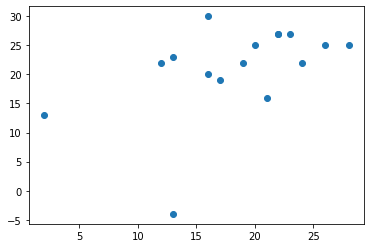

In [18]:
plt.scatter(arr1, arr2)

Nope... nothing there either. 

OK. So in lieu of a better understanding on what drove the change in median household incomes, I choose to leave the category for 2006 the same as it was for 2013. This is a conservative approach as you would have had to be MORE affluent in 2006 to make it into the affluence category. 

### Calculating the national median of median household incomes

In [41]:
medList=groupG.loc[groupG['Year']==2018,'MedInc'].dropna().unique().tolist()
len(medList)


851

In [42]:
perc=np.percentile(medList,50)
if (perc > 50000) & (perc <= 70000):
    print('National median of median incomes:',4)
elif (perc > 70000) & (perc <= 100000):
    print('National median of median incomes:',5)
elif (perc > 100000) & (perc <= 150000):
    print('National median of median incomes:',6)
elif (perc > 150000):
    print('National median of median incomes:',7) 

National median of median incomes: 6
